# 1. Introduction
Dataset description: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand\
The Business Problem
In Recent Year , City Hotel and Resort Hotel have seen High Cancellation Rates.Each Hotel is now Dealing with number of issue as result including Fewer revenue and Less than ideal Hotel room use.

- `hotel`: Categorical variable indicating the hotel type (City Hotel or Resort Hotel).
- `is_canceled`: Binary variable indicating whether the booking was canceled (1) or not (0).
- `lead_time`: Number of days between the booking date and the arrival date.
- `arrival_date_year`: Year of arrival date.
- `arrival_date_month`: Month of arrival date.
- `arrival_date_week_number`: Week number of arrival date.
- `arrival_date_day_of_month`: Day of the month of arrival date.
- `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- `adults`: Number of adults.
- `children`: Number of children.
- `babies`: Number of babies.
- `meal`: Type of meal booked.
- `country`: Country of origin of the guest.
- `market_segment`: Market segment designation.
- `distribution_channel`: Booking distribution channel.
- `is_repeated_guest`: Binary variable indicating whether the booking was made by a repeated guest (1) or not (0).
- `previous_cancellations`: Number of previous bookings that were cancelled by the guest.
- `previous_bookings_not_canceled`: Number of previous bookings that were not cancelled by the guest.
- `reserved_room_type`: Code of room type reserved by the guest.
- `assigned_room_type`: Code for the room assigned to the guest.
- `booking_changes`: Number of changes made to the booking.
- `deposit_type`: Type of deposit made by the guest.
- `agent`: ID of the travel agency that made the booking.
- `company`: ID of the company/entity that made the booking or responsible for paying the booking.
- `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the guest.
- `customer_type`: Type of booking, assuming one of four categories: Contract, Group, Transient, and Transient-Party.
- `adr`: Average daily rate (sum of all transactions divided by the total number of nights stayed).
- `required_car_parking_spaces`: Number of car parking spaces required by the guest.
- `total_of_special_requests`: Number of special requests made by the guest.
- `reservation_status`: Last reservation status (Canceled, Check-Out, No-Show).
- `reservation_status_date`: Date at which the last status was set.

# 2. Setting up environments

In [2]:
!pwd
!ls 
!pip install -r requirements.txt

/home/thinhlpg/code/dbm301-excercies/excercise-01
data  hotel_booking.ipynb  requirements.txt


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# 3. Reading & Understanding the data

In [6]:
# List all files in a directory using os.listdir
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/raw/hotel_bookings.csv


In [7]:
hotel_bookings_DF = pd.read_csv('./data/raw/hotel_bookings.csv')
hotel_bookings_DF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [8]:
hotel_bookings_DF.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [9]:
# Inspect Data Frames
# Database dimension
print("Database dimension - hotel_booking_DF     :",hotel_bookings_DF.shape)

#Database size (number of cells)
print("Database size - hotel_booking_DF          :",hotel_bookings_DF.size)

Database dimension - hotel_booking_DF     : (119390, 32)
Database size - hotel_booking_DF          : 3820480


In [10]:
# Database data types
print("Database data types - hotel_booking_DF    :")
hotel_bookings_DF.info(verbose=True)

Database data types - hotel_booking_DF    :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          11

In [11]:
# Checking the numeric variables of the dataframes
hotel_bookings_DF.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# 4. Data Cleaning & Manipulation

<Axes: >

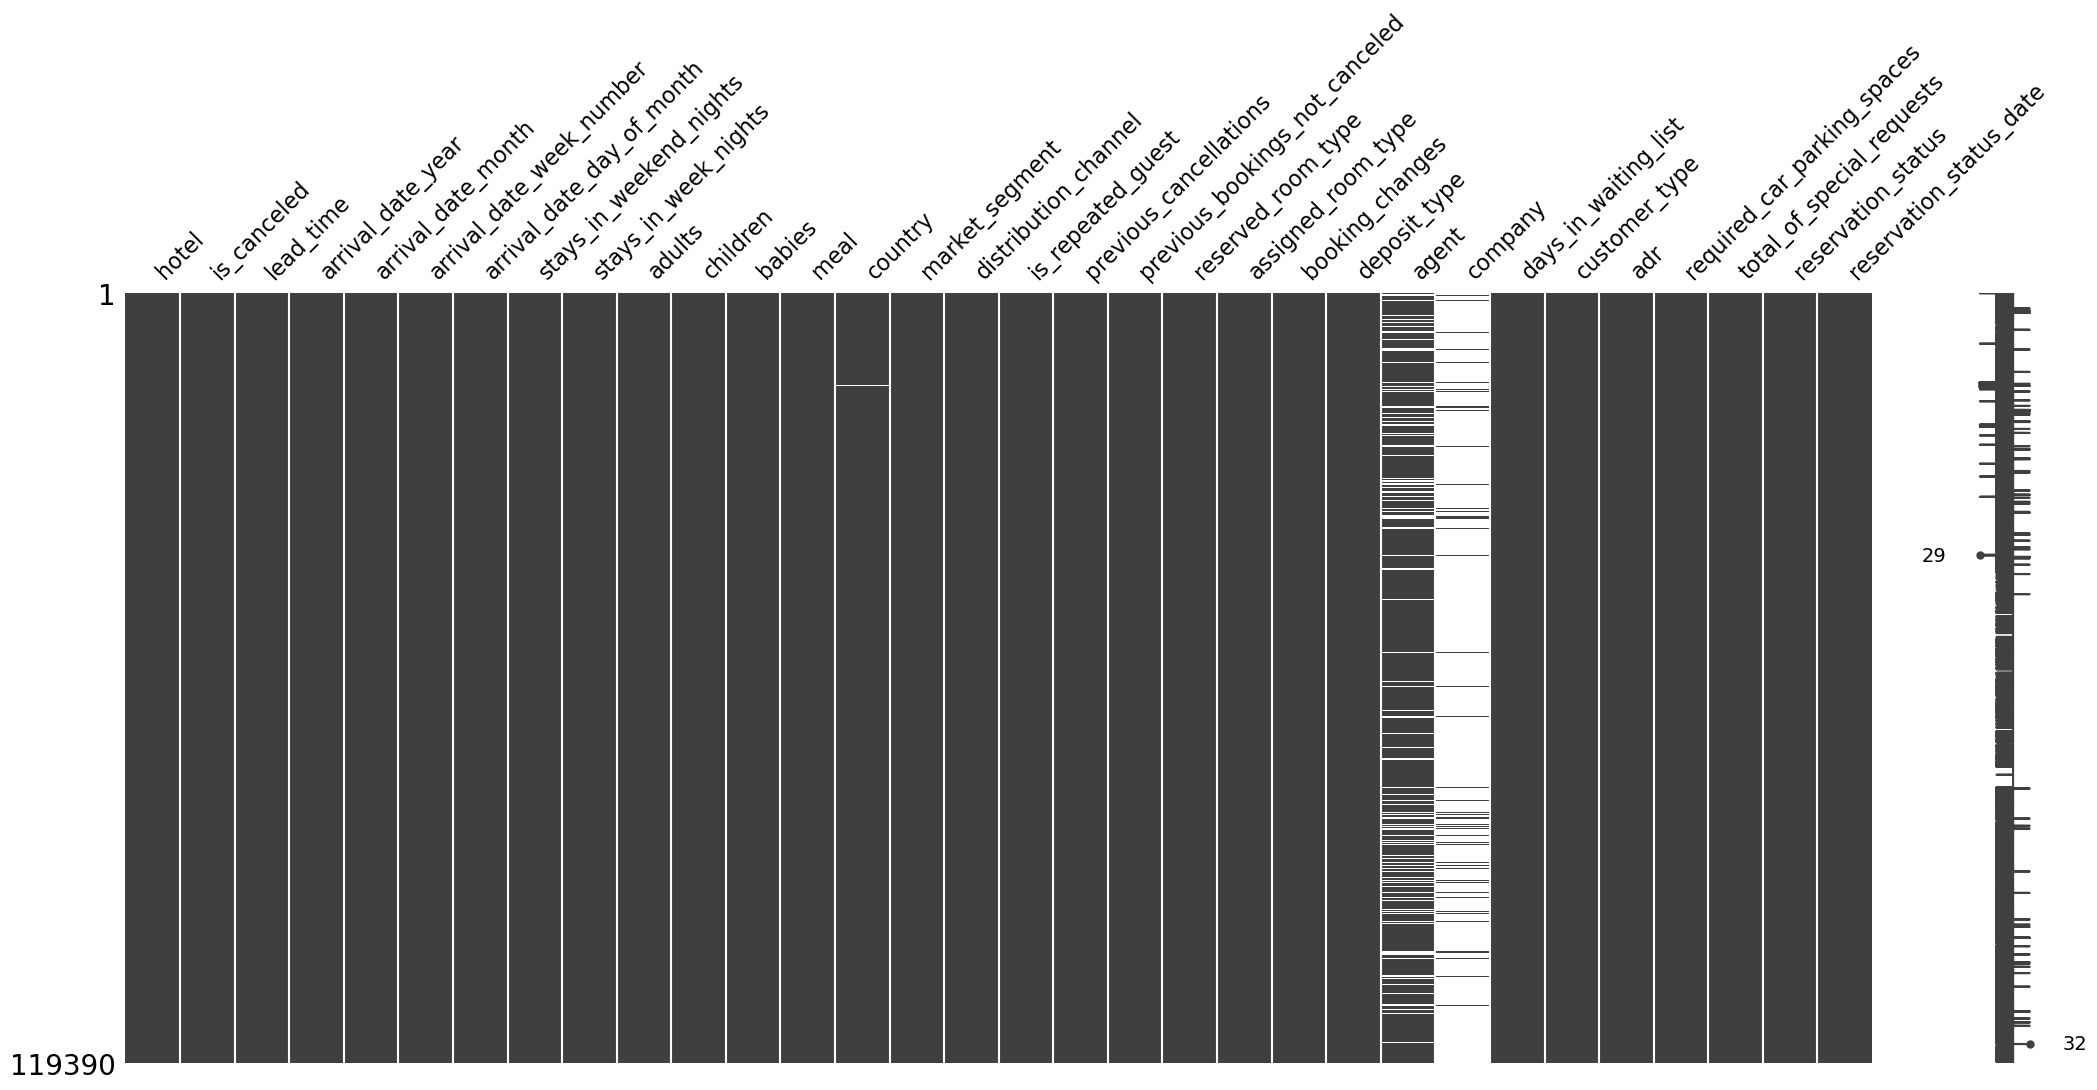

In [12]:
# Visualizing the missing values
import missingno as mn
mn.matrix(hotel_bookings_DF)

In [13]:
# % null value in each column
round(hotel_bookings_DF.isnull().sum() / hotel_bookings_DF.shape[0] * 100.00,2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


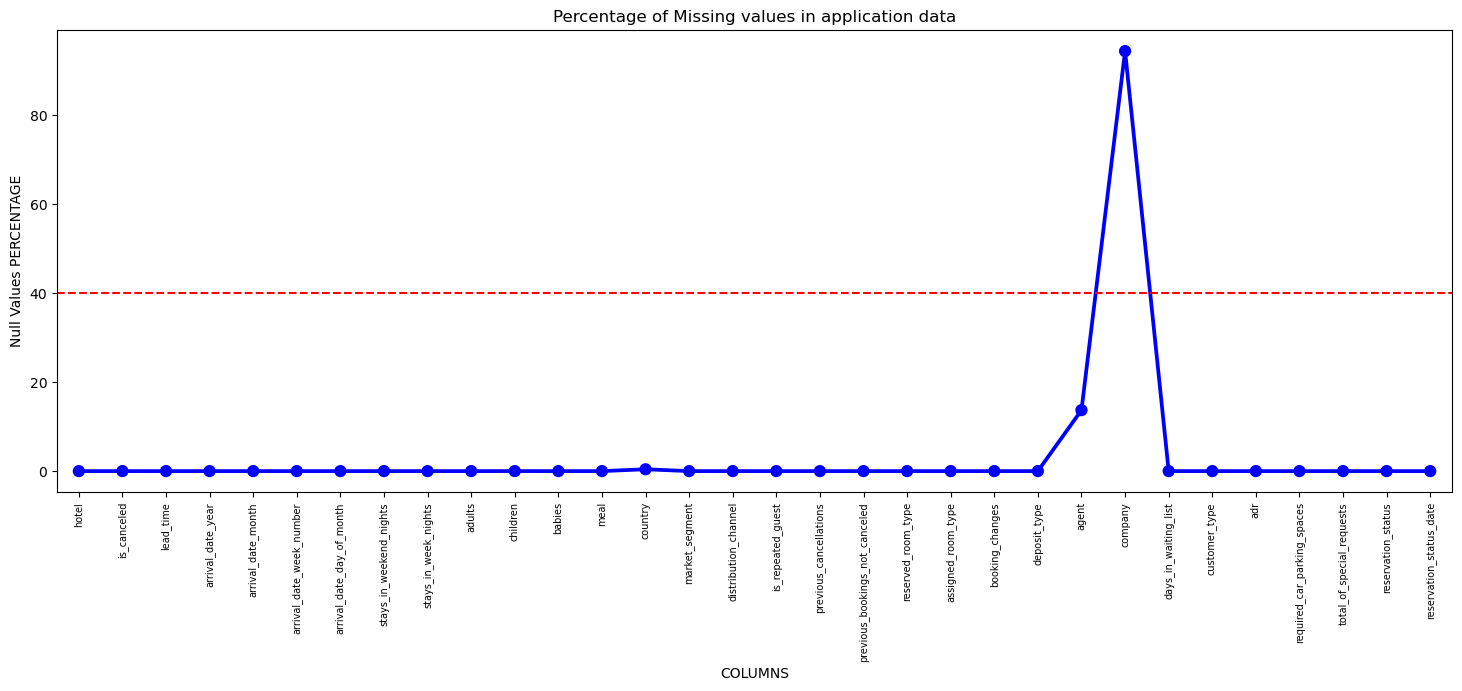

In [14]:
null_hotel_bookings_DF = pd.DataFrame((hotel_bookings_DF.isnull().sum())*100/hotel_bookings_DF.shape[0]).reset_index()
null_hotel_bookings_DF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_hotel_bookings_DF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

Insight: `agent` and `company` have the most. We might drop `company` since it has over 90% missing values.

In [17]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
hotel_bookings_DF_cln = hotel_bookings_DF.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
hotel_bookings_DF_cln["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# Dropping these entries with no guests.
zero_guests = list(hotel_bookings_DF_cln.loc[hotel_bookings_DF_cln["adults"]
                   + hotel_bookings_DF_cln["children"]
                   + hotel_bookings_DF_cln["babies"]==0].index)
hotel_bookings_DF_cln.drop(hotel_bookings_DF_cln.index[zero_guests], inplace=True)

In [18]:
hotel_bookings_DF_cln.shape

(119210, 32)

# 5. Exploratory Data Analysis (EDA)